In [1]:
gcd(24, 232)

8

In [2]:
from timeit import timeit

In [4]:
def power():
    return pow(23742, 724927, 39273)

#timeit(power)

In [10]:
x, n, mod = 23742, 724927, 39273

In [144]:
from timeit import timeit


def mod_pow(x, n, mod):
    power, x = 1, x % mod

    while n > 0:
        if n & 1 == 1:
            power = power * x % mod
        x = x * x % mod
        n = n >> 2

    return power

max_int = 1e50
n = randint(max_int/2, max_int)
p = random_prime(max_int, lbound=max_int/2)
exponent = randint(max_int/2, max_int) 

def compute_with_my_mod():
    v = mod_pow(n, exponent, p)

timeit(compute_with_my_mod, number=10)

0.0015959739685058594

In [6]:
def sage_pow():
    x, n, mod = 23742, 724927, 39273
    return power_mod(x, n, mod)

#timeit(sage_pow)

In [142]:
import timeit

MAX_INT  = 1e80
NSAMPLES = 1000

def compare_modular_exponentiation_efficiency(nsamples=NSAMPLES, max_int=MAX_INT):
    
    data = {
        'n': [],
        'p': [],
        'time_power_mod': [],
        'time_my_mod': [],
        'time_new_python': [],
        #'time_regular_exponentiation': []
    }
    
    for _ in range(nsamples):
        n = randint(max_int/2, max_int)
        p = random_prime(max_int, lbound=max_int/2)
        exponent = randint(max_int/2, max_int)

        def compute_with_power_mod():
            v = power_mod(n, exponent, p)

        time_power_mod = timeit.timeit(compute_with_power_mod, number=10)

        def compute_with_regular_exponentiation():
            v = n**exponent % p

        #time_regular_exponentiation = timeit.timeit(compute_with_regular_exponentiation, number=10)

        def compute_with_my_mod():
            v = mod_pow(n, exponent, p)
        
        time_my_mod = timeit.timeit(compute_with_my_mod, number=10)
        
        def compute_with_new_python_mod():
            v = pow(n, exponent, p)
        
        time_new_python = timeit.timeit(compute_with_new_python_mod, number=10)
        
        data['n'].append(n)
        data['p'].append(p)
        data['time_power_mod'].append(time_power_mod)
        data['time_my_mod'].append(time_my_mod)
        data['time_new_python'].append(time_new_python)
        #data['time_regular_exponentiation'].append(time_regular_exponentiation)

        
    return data

data = compare_modular_exponentiation_efficiency()

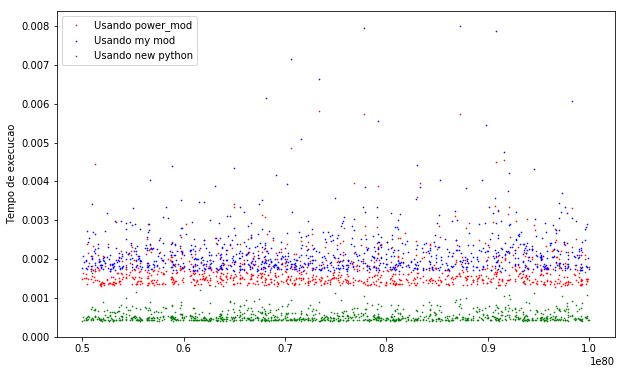

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

df = pd.DataFrame.from_dict(data)

plt.figure(figsize=(10, 6))

plt.scatter(x=df['n'], y=df['time_power_mod'], label='Usando power_mod', c='red', s=0.4)
#df.plot.scatter(x='n', y='time_regular_exponentiation', c='blue', label='Sem usar power_mod', ax=ax, s=0.4)
plt.scatter(x=df['n'], y=df['time_my_mod'], c='blue', label='Usando my mod', s=0.4)
plt.scatter(x=df['n'], y=df['time_new_python'], c='green', label='Usando new python', s=0.4)

plt.ylim(bottom=0)
plt.ylabel('Tempo de execucao')
plt.legend()

In [145]:
import distance

ImportError: No module named distance

In [ ]:
''